# Project: Investigate a Dataset (Medical Appointment No Shows)


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
    <ul> 
      <li><a href="#remove">Remove unneccassry columns,rows</a></li>
      <li><a href="#change">Changing column names</a></li> 
      <li><a href="#changedata">Changing datatypes </a></li> 
       <li><a href="#add">Adding new columns </a></li> 
    </ul>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul>
     <li><a href="#Q1">Q1: Do patients with serious medical conditions affect the possibilty of a no-show?if yes-which has the most effect?
    <li><a href="#Q2"> Q2: Does sending SMS reminders help in decreasing the possibilty of a no-show happening?
     <li><a href="#Q3"> Q3: Does the patient who owns a scholarship tend to have less no-shows? 
    <li><a href="#Q4">Q4: Is there a specific age group and gender that tends to make a no-show?
    <li><a href="#Q5">Q5: Does the difference between the scheduled day and appointment day have an impact on the no-show incident? 
    <li><a href="#Q6">Q6:Is there a specific day where no-shows tend to happen?
    <li><a href="#Q7">Q7: Which neighbourhood has the highest no-show?
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>  Welcome to my Investigate a Dataset Project. Here I will be analyzing data about Medical Appointment No Shows in a hospital in Brazil that states that 30% of  their patients end up not showing up. When a patient sets an appoitment can we predict if a patient will show up or not based on the previous No-Shows history provided in our dataset? Is it the patients fault or the hospitals fault? We will have clearer insights about all this after answering the following questions:

- Q1: Do patients with serious medical conditions affect the possibilty of a no-show?if yes-which has the most effect?
- Q2: Does sending SMS reminders help in decreasing the possibilty of a no-show happening?
- Q3: Does the patient who owns a scholarship tend to have less no-shows? 
- Q4: Is there a specific age group and gender that tends to make a no-show?
- Q5: Does the difference between the scheduled day and appointment day have an impact on the no-show incident? 
- Q6:Is there a specific day where no-shows tend to happen?
- Q7: Which neighbourhood has the highest no-show?

In [1]:
#importing libraries that we will be using in our analysis. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')


<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data,check what needs to be cleaned, trimmed,changed or added to help us have a better version for our next steps

### General Properties

In [2]:
#Loading file to a dataframe 'df'

df= pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

#Reading an overview from our dataset using the first 5 rows in our dataframe

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#So let's find out more about our columns and understand our datatypes and have a general overview about our dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**From the above we can find the following:**
1) We have 14 columns and 110527 rows

2) We have no null values in our dataset

3) ScheduledDay,AppointmentDay are both strings, we need to change them to datetime, also wouldn't it be better if we added a new column called 'waiting_days' which would be the difference between the scheduled day and appointment day to get better insights

4) We can change all column names to lowercase letters for consistency and also to make it easier to write a code and we can change 'no-show' to 'no_show' by replacing the dash with an underscore

5) 'No-show' column has a different encoding...'No' means patient showed up, 'Yes' means patient didn't show up. 

6) We don't need the PatientID , appointmentID in our analysis so it's better if we omit them. 

7) The columns(Scholarship,Hipertension,Diabetes,Handcap,SMS_received) are ints(0,1). Let's find more about them in the next code to check if there is something more than just 0/1.And also we can change their datatype to bool to make analysis easier.

8) Also how about adding a new category called age group to get better insights regarding the age of patients

In [4]:
# Checking the unique values we have for each column

df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

**So we can conclude from here:**
(Gender,Scholarship,Hipertension,Diabetes,Alcoholism,Sms_recieved,no-show) columns all have 2 unique values except for ***Handcap*** has 5 unqiue values.

>According to this [link](https://www.kaggle.com/datasets/joniarroba/noshowappointments/discussion/29699) , the author of the dataset states that the values from 0 to 5 in Handcap means that the patient has more than 1 disability. *eg: 2 means 2 disabilites , 4 means 4 disabilties and 0 means no disabilities*.
In that case here we will leave the Handcap as ints. And change the others to boolean values.

In [5]:
#Checking for duplicated

df.duplicated().sum() 

0

Great! we don't have any duplicates in our dataset
Also wouldn't it give us better insights if we made an age group for the range of ages we have? Okay so I will need to have a closer look on our data(the min and max)

In [6]:
#Checking the information and characteristics of the Age column to know more about it. 

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Something looks wrong.The min in Age is -1. And it doesn't make sense to have  an age with a negative number . So we will need to drop the rows that have the age=-1 

Also the appointmentday column did catch my eye in something. That after the T letter the time is set to 00:00:00
So let's check if it's all set to time 00:00:00

In [7]:
df['AppointmentDay'].str.strip().value_counts()

2016-06-06T00:00:00Z    4692
2016-05-16T00:00:00Z    4613
2016-05-09T00:00:00Z    4520
2016-05-30T00:00:00Z    4514
2016-06-08T00:00:00Z    4479
2016-05-11T00:00:00Z    4474
2016-06-01T00:00:00Z    4464
2016-06-07T00:00:00Z    4416
2016-05-12T00:00:00Z    4394
2016-05-02T00:00:00Z    4376
2016-05-18T00:00:00Z    4373
2016-05-17T00:00:00Z    4372
2016-06-02T00:00:00Z    4310
2016-05-10T00:00:00Z    4308
2016-05-31T00:00:00Z    4279
2016-05-05T00:00:00Z    4273
2016-05-19T00:00:00Z    4270
2016-05-03T00:00:00Z    4256
2016-05-04T00:00:00Z    4168
2016-06-03T00:00:00Z    4090
2016-05-24T00:00:00Z    4009
2016-05-13T00:00:00Z    3987
2016-05-25T00:00:00Z    3909
2016-05-06T00:00:00Z    3879
2016-05-20T00:00:00Z    3828
2016-04-29T00:00:00Z    3235
2016-05-14T00:00:00Z      39
Name: AppointmentDay, dtype: int64

Looks like the appointment time is all set to 0, in that case here we will need to trim off the timestamp in both appointment day and scheduled day which ofcourse can be a limitation in our analysis.

#### Wrapping up: 
Here's the list of things we will need to fix in our dataset:

1) **Removing unnecassry columns and rows** Remove the 'PatientId','AppointmentID' columns, Remove the unneccessary rows in Age 

2) **Change column name:** Change all column names to lowercase letters and change from no-show to no_show

3) **Change DataTypes:** Change datatypes of the Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,change data type of appointment day and scheduled day and also trim unneccasry data in both columns

4) **Adding New Columns:** Adding Age Group Column, Number of Days Column(difference between appointment and scheduled days)

## Cleaning our Data 

<a id='remove'></a>

### Remove the 'PatientId','AppointmentID' columns, Remove the unneccessary rows in Age 
Removing the PatientID and AppointmentID columns from our dataset

In [8]:
#Dropping the PatientId and AppointmentID colums

df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)

In [9]:
#Checking that our columns are correctly dropped

df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [10]:
#Getting rows with age less than 0

df.query('Age < 0')   

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [11]:
#Removing these rows from dataframe 

df.drop(index=99832,inplace=True)

In [12]:
df['Age'].describe()   #Confirming that we no longer have -1 as an age anymore

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

<a id='change'></a>
### Change column names:

Change all column names to lowercase letters and change all spaces and dashes to underscores

In [13]:
#Lambda function takes column name and turns it to lower case and replaces the '-' to '_'

df.rename(columns=lambda x: x.strip().lower().replace("-","_"), inplace=True)

In [14]:
df.head(1)  #double-checking that our code worked

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


To avoid any confusion No show encoding is different . Yes: Means the patient did not show up
No: Means the Patient did show up 

<a id='changedata'></a>
### Changing DataTypes:
 Change datatypes of the Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received, change data type of appointment date and scheduled day

In [15]:
# Let's assign a list of columns that we want to change to boolean datatype

columns=['scholarship','hipertension','diabetes','alcoholism','sms_received']

# Iterating through each column and changing the type to bool.

for column in columns:
    df[column]=df[column].astype('bool')

In [16]:
#changing both scheduledday and appointmentday to datetime 

#First, we only need the day,month and year. So we will need to trim the rest of the string with timestamp
#Let's have a look at scheduleddate to know what exaclty needs to be trimmed 

index=df['scheduledday'].str.find('T').value_counts()

#Ok so we will need to find the position of letter 'T'

index


10    110526
Name: scheduledday, dtype: int64

we will need to trim after index number 10 

In [17]:
#Lets check the appointment date 

index=df['appointmentday'].str.find('T') .value_counts()

index


10    110526
Name: appointmentday, dtype: int64

Same goes for the appointment day

In [18]:
#Trimming strings after index 10 

df['scheduledday']=df['scheduledday'].str[:10]
df['appointmentday']=df['appointmentday'].str[:10]

In [19]:
#Changing the new rows to datetime

df['scheduledday']=pd.to_datetime(df['scheduledday'])

df['appointmentday']=pd.to_datetime(df['appointmentday'])


In [20]:
df['scheduledday'].head() #Checking the trimming and conversion were made successfully

0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: scheduledday, dtype: datetime64[ns]

In [21]:
df['appointmentday'].head() #Checking the trimming and coversion were made successfully

0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: appointmentday, dtype: datetime64[ns]

In [22]:
df.info() #Checking that our data was converted correctly.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   gender          110526 non-null  object        
 1   scheduledday    110526 non-null  datetime64[ns]
 2   appointmentday  110526 non-null  datetime64[ns]
 3   age             110526 non-null  int64         
 4   neighbourhood   110526 non-null  object        
 5   scholarship     110526 non-null  bool          
 6   hipertension    110526 non-null  bool          
 7   diabetes        110526 non-null  bool          
 8   alcoholism      110526 non-null  bool          
 9   handcap         110526 non-null  int64         
 10  sms_received    110526 non-null  bool          
 11  no_show         110526 non-null  object        
dtypes: bool(5), datetime64[ns](2), int64(2), object(3)
memory usage: 7.3+ MB


<a id='add'></a>
### Adding New Columns:

Adding Age Group Column, Number of Days Column(difference between appointment and scheduled days)


#### Age Group Column: 
We will add a new column to our dataframe called 'age_group'. The age group column will have 4 categories and will have a dtype of object(string). 
 The 4 categories are:
 - Children (0-14 years)
 - Youth (15-24 years)
 - Adults (25-64 years)
 - Seniors(65 years and above)


In [23]:
# first let's add a list with our new category names

category_names=['Children','Youth','Adults','Seniors']

#second  we will add another list with our category edges, meaning the  end edge of every category we have.

category_edges=[0,14,24,64,115] # I used the max value we have in the 'age' column from the description code above

In [24]:
df['age_group'] = pd.cut(df['age'], category_edges, labels=category_names)  #using the cut funtion to categorize our dataset

The code works well except for one part if we checked the data of patients with age 0 it shows null values in age group. 

In [25]:
df.query('age==0')['age_group'] 

59        NaN
63        NaN
64        NaN
65        NaN
67        NaN
         ... 
110345    NaN
110346    NaN
110454    NaN
110460    NaN
110507    NaN
Name: age_group, Length: 3539, dtype: category
Categories (4, object): ['Children' < 'Youth' < 'Adults' < 'Seniors']

So we will fill all the null values where age=0 

In [26]:
df['age_group']=df['age_group'].fillna('Children')  #filling null values with 'Children'

In [27]:
#Checking if there are any nulls values in age_group

df['age_group'].isnull().sum()

0

Great! No null values. Let's proceed to the next step

#### Waiting Days Column:

In this column it will calculate the days difference between  the appointment day(The day of the actual appointment) and  the scheduled day(The day when the patient registered for an appointment). I will call this column days_difference 

In [28]:
df['waiting_days'] =(df['appointmentday']-df['scheduledday']).dt.days

In [29]:
df['waiting_days'].describe() #lets have a closer look at our new column

count    110526.000000
mean         10.183794
std          15.255034
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: waiting_days, dtype: float64

The min day difference is a negative number which ofcourse doesn't make sense. As appointment days should be after scheduled days and not before. So we will have to discard them

In [30]:
#Assiging negative_days_index to fetch the negative indexes of the negative values in the day difference column
negative_days_diff=df.query('waiting_days <0').index
#Removing the negative indexes
df.drop(index=negative_days_diff,axis=index,inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   gender          110521 non-null  object        
 1   scheduledday    110521 non-null  datetime64[ns]
 2   appointmentday  110521 non-null  datetime64[ns]
 3   age             110521 non-null  int64         
 4   neighbourhood   110521 non-null  object        
 5   scholarship     110521 non-null  bool          
 6   hipertension    110521 non-null  bool          
 7   diabetes        110521 non-null  bool          
 8   alcoholism      110521 non-null  bool          
 9   handcap         110521 non-null  int64         
 10  sms_received    110521 non-null  bool          
 11  no_show         110521 non-null  object        
 12  age_group       110521 non-null  category      
 13  waiting_days    110521 non-null  int64         
dtypes: bool(5), category(1), datetime64[

We have a total of *110521* entries and *14* columns. So our unwated rows were removed successfully.

In the next step, I will divide our dataframe into two dataframes. One with the data of the patients who showed up and the other with the people who did not show up

In [32]:
df_no_show=df[df['no_show']=="Yes"]

df_show=df[df['no_show']=="No"]

<a id='eda'></a>
## Exploratory Data Analysis:
>In this section we will be digging deeper  in our dataframe and answer all questions we introduced before by exploring interesting visuals and by then we will be having a full conclusion to our analysis



<a id='Q1'></a>
### Q1: Do patients with serious medical conditions affect the possibilty of a no-show?if yes-which has the most effect?



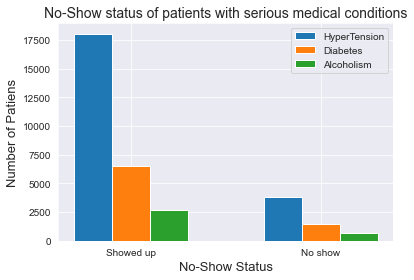

In [33]:
#We have 4 different medical conditions hypertension,diabetes,alcoholism,handcap

# In this code here I will work on medical contions hypertension,diabetes,alcoholism

labels=['Showed up','No show'] #x-axis labels 
legends=['HyperTension','Diabetes','Alcoholism'] #setting a list for the legend
x=np.arange(len(labels))   #x-co-ords we will set it using numpy array with the length of the labels to add on x-axis
width=0.2

#Getting the sum of patients who showed-up and did not show up for each medical condition

y1=df.groupby('no_show')['hipertension'].sum()
y2=df.groupby('no_show')['diabetes'].sum()
y3=df.groupby('no_show')['alcoholism'].sum()


#plotting our bar chart 
plt.bar(x-width,y1,width);
plt.bar(x,y2,width);
plt.bar(x+width,y3,width);


plt.title("No-Show status of patients with serious medical conditions",fontsize=14);
plt.xlabel("No-Show Status",fontsize=13)
plt.ylabel("Number of Patiens",fontsize=13);
plt.xticks(x,labels);
plt.legend(legends);


 ***Findings:*** What we can find from this chart that the bar lengths for every medical condition of the people who showed-up are a lot more than those who didn't show up.

So people with serious medical conditions are more likely to show-up than not to. And hypertension has the highest amount of patients in both cases.

No we will check more about handicapped patients 
NB: Our next graph will actually show as well the patients with no disbility. But it would be better not to discard them. To have a full picture whether or not patients with no disabilties tend to have more no-shows.


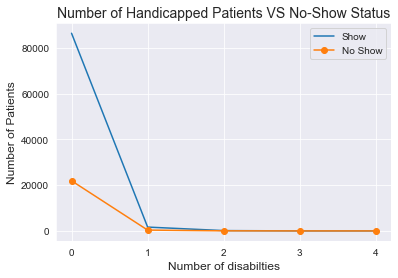

In [34]:
no_show_handcap=df_no_show['handcap'].value_counts()   #No-Show Handicapped patients 
handcap_show=df_show['handcap'].value_counts()         #Handincapped patients who showed up
x=np.arange(5) # We have 5 different condtions for handicapped patiens [0 means no disability]
plt.plot(x,handcap_show);
plt.plot(x,no_show_handcap,marker='o');
plt.xticks(np.arange(min(x),max(x)+1,1.0))   #Starting from minimum number which is 0 till  maximum 4 and taking one step. 
plt.legend(['Show','No Show']);

plt.title('Number of Handicapped Patients VS No-Show Status',fontsize=14);
plt.xlabel('Number of disabilties',fontsize=12);
plt.ylabel('Number of Patients',fontsize=12);

***Findings:*** Patients who do not have a disability tend to make a no-show more than the people having disabilties.
Patients with  disabilties make 0 no-shows.

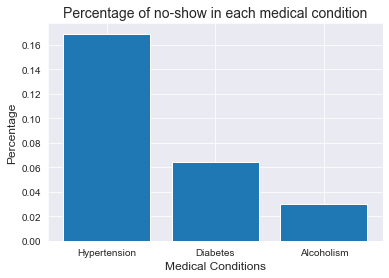

In [35]:
#A closer look onto the no-show patients with special medical conditions: [hypertension,alcoholism,diabetes]
# This graph here I will depend on showing the percentage rather than the count

#Patients with hypertension
count1= df_no_show['hipertension'].sum()
total= df_no_show['hipertension'].count()
per1=count1/total

#patients with alcoholism
# we will not need to calcualte the total again as they all have the same total

count2=df_no_show['diabetes'].sum()
per2=count2/total

#patients with diabetes

count3=df_no_show['alcoholism'].sum()
per3=count3/total

#Adding my data in a dictionary to make it easier for plotting

data={'Hypertension':per1,'Diabetes':per2,'Alcoholism':per3}
xlabels=list(data.keys())  #labels for our xaxis
values=list(data.values()) #values of each bar 

#plotting our graphs

plt.bar(xlabels,values);

plt.title( 'Percentage of no-show in each medical condition',fontsize=14)
plt.xlabel('Medical Conditions',fontsize=12)
plt.ylabel('Percentage',fontsize=12);

<a id='Q2'></a>
###  Q2: Does sending SMS reminders help in decreasing the possibilty of a no-show happening?

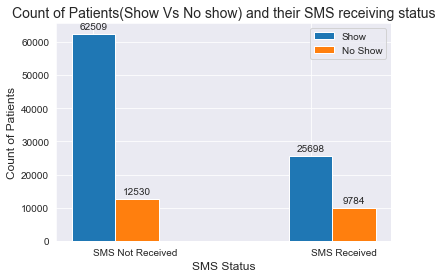

In [36]:
#First bar shows the patients who showed up - those who received and did not receive a message 
show_sms=df_show['sms_received'].value_counts()

#Second bar shows the patients who did not show up -those who received a message and those who did not
no_show_sms=df_no_show['sms_received'].value_counts() 

labels=['SMS Not Received ','SMS Received']   #Setting our x-axis labels using a list
xaxis=np.arange(len(labels))                  # Setting an array for the xaxis using numpy with the length of labels

fig,ax=plt.subplots()

bar1=plt.bar(xaxis,show_sms,width);                    #first barchart in blue 
bar2=plt.bar(xaxis+width,no_show_sms,width)               #second barchart in orange 


plt.legend(['Show','No Show']);
plt.xticks(xaxis,labels,horizontalalignment='left'); 
plt.title('Count of Patients(Show Vs No show) and their SMS receiving status',fontsize=14);
plt.xlabel('SMS Status',fontsize=12);
plt.ylabel('Count of Patients',fontsize=12);

ax.bar_label(bar1,padding=3);  #Showing data labels 
ax.bar_label(bar2,padding=3);  #Showing data labels 

***Findings:*** The graph here shows that there is a huge number of patients(625029) who did not receive a message yet they did show up compared to the people who did not show up whether they did receive a message or not.

The number of patients that did not show up and haven't received a message are more than those who received a message. 

<a id='Q3'></a>
### Q3: Does the patient who owns a scholarship tend to have less no-shows?

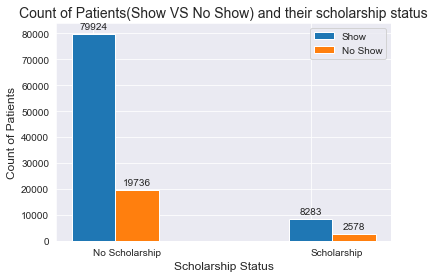

In [37]:
#First bar in blue will show patients that showed up to their appointment whether they have a scholarship or not 

show_scholar=df_show['scholarship'].value_counts()

#Second bar in orange will show patients that did not show up to their appointment whether they a have a scholarship or not

no_show_scholar=df_no_show['scholarship'].value_counts()

labels=['No Scholarship','Scholarship']
x=np.arange(len(labels));

fig,ax=plt.subplots();

bar1=plt.bar(xaxis,show_scholar,width);                   
bar2=plt.bar(xaxis+width,no_show_scholar,width);         

plt.title('Count of Patients(Show VS No Show) and their scholarship status',fontsize=14);
plt.xlabel('Scholarship Status',fontsize=12);
plt.ylabel('Count of Patients',fontsize=12)
plt.legend(['Show','No Show']);
plt.xticks(x,labels,horizontalalignment='left');

ax.bar_label(bar1,padding=3);
ax.bar_label(bar2,padding=3);

***Findings:*** From the graph we can find that a large number of patients who showed up do not have a scholarship.

Patients who did not show up and do not have a scholarship are more than those who didn't show up and own a scholarship.

<a id='Q4'></a>
### Q4: Is there a specific age group and gender that tends to make a no-show?

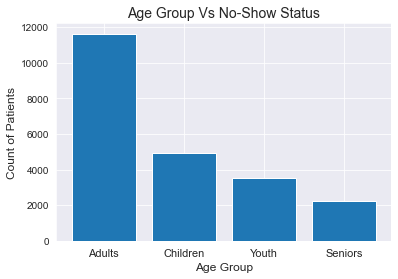

In [38]:
#First we will start by age group

no_show_age=df_no_show['age_group'].value_counts()

labels=list(no_show_age.index)  #Getting labels names from Series of Age Group we created 
x=np.arange(len(labels))

bar=plt.bar(x,no_show_age);


plt.xticks(x,labels,fontsize=11);
plt.title('Age Group Vs No-Show Status',fontsize=14);
plt.xlabel('Age Group',fontsize=12);
plt.ylabel('Count of Patients',fontsize=12);

***Findings:*** Adults have the highest count of no-shows
while Seniors have the least count of  no shows. 

We'll dig in deeper in the adults age group to know more about the ages that tend to no-show 

NB: Adults are from 25 to 64 years

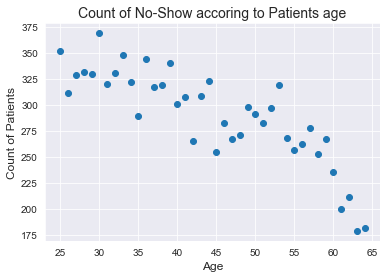

In [39]:
adults=df_no_show.query('age_group== "Adults"')  #Filtering with the adults age group

#plotting the graph
y=adults['age'].value_counts()   #count for each age
x=list(y.index)                  #value_counts() results with a series. So we only need the indexes for the xaxis labels.
plt.scatter(x,y);
;
plt.title('Count of No-Show accoring to Patients age',fontsize=14);
plt.xlabel('Age',fontsize=12);
plt.ylabel('Count of Patients',fontsize=12);

***Findings:***  We can see that the more the age increases the less no-show happens. So maybe adults from the age 25 till 40 tend to have higher no-shows

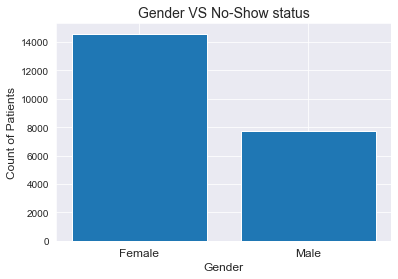

In [40]:
# Then we will check by gender.


no_show_gender=df_no_show['gender'].value_counts()  #count of each female and male 

labels= ['Female','Male']   #x-axis labels 

x=list(no_show_gender.index)   #x-coords. From value_counts() return a series. so we only need the index

bar=plt.bar(x,no_show_gender);

plt.xticks(x,labels,fontsize=12);

plt.title('Gender VS No-Show status',fontsize=14);
plt.xlabel('Gender',fontsize=12);
plt.ylabel('Count of Patients',fontsize=12);

***Findings:*** This graph shows here that females tend not to show more than males. 

Next we'll check which age group in every gender has more no-show incidents 

In [41]:
#Grouping by both gender and age Group 

gender_group=df_no_show.groupby(['gender','age_group'])['no_show'].count() 
gender_group['F']     #Filtering by gender='F'

age_group
Children    2374
Youth       2501
Adults      8200
Seniors     1516
Name: no_show, dtype: int64

In [42]:
gender_group['M'] #Filtering by gender='M'

age_group
Children    2551
Youth       1037
Adults      3419
Seniors      716
Name: no_show, dtype: int64

Female adults have  the most noshow incidents and Male adults have the most no show incidents 

Next we'll check this output  in a graph:

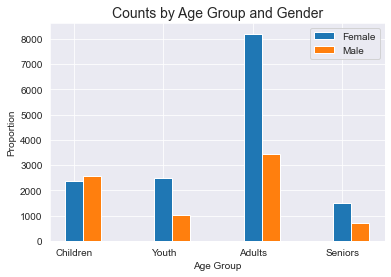

In [43]:
labels=list(gender_group['F'].index)   #Gettings labels from series index. 
x=np.arange(len(labels))              # x-corrods a numpy array with the length of labels list

bar1=plt.bar(x,gender_group['F'],width); 
bar2=plt.bar(x+width,gender_group['M'],width);

plt.legend(['Female','Male']);
plt.xticks(x,labels);
plt.title('Counts by Age Group and Gender',fontsize=14);
plt.ylabel('Proportion');
plt.xlabel('Age Group');

<a id='Q5'></a>
### Q5: Does the difference between the scheduled day and appointment day have an impact on the no-show incident? 

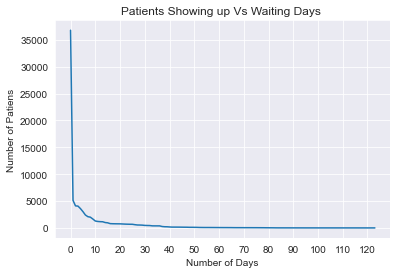

In [44]:
y=df_show['waiting_days'].value_counts()  #Creating a series with unique waiting days of people who showed-up
x=np.arange(len(y.index))  #xco-ords=length of list of series .
plt.plot(x,y);    # We are going to draw a line plot to show correlation
plt.title('Patients Showing up Vs Waiting Days ');
plt.xlabel('Number of Days');
plt.ylabel('Number of Patiens');
plt.xticks(np.arange(min(x), max(x),10));

**Findings:** This graph relationship here has a negative correlation. 
The lesser the waiting days the more the people are showing up. 

0 waiting days have a lot of patients showing up , while it's almost zero when it reaches 35 days.

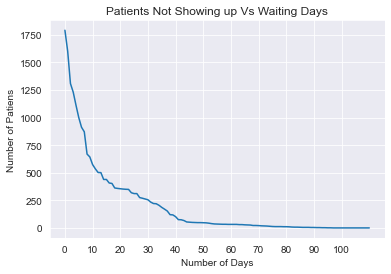

In [45]:
#we will repeat the same steps here for the patients who did not show up 

y=df_no_show['waiting_days'].value_counts()  
x=np.arange(len(y.index))
plt.plot(x,y);
plt.title('Patients Not Showing up Vs Waiting Days');
plt.xlabel('Number of Days');
plt.ylabel('Number of Patiens');
plt.xticks(np.arange(min(x),max(x),10));

***Findings:*** This graph also has a negative correlation relationship.

While this graph here actually shows that for example 25 waiting day have more no-showing patients than the ones who showedup. 

In [46]:
#Let's check here the average waiting day that the hospital normally gives to people who did not show up 

Average_waiting_days=df_no_show['waiting_days'].mean()

int(Average_waiting_days)

15

In [47]:
#The average waiting days is 15 . now let's check how many patients did not show up  after waiting 15 days.
df_no_show.query('waiting_days==15')['no_show'].count()

502

502 patients did not show up when waiting for 15 days for their appointment. Which makes us think that the hospital needs to minimize its waiting days.

<a id='Q6'></a>
### Q6:Is there a specific day where no-shows tend to happen? 

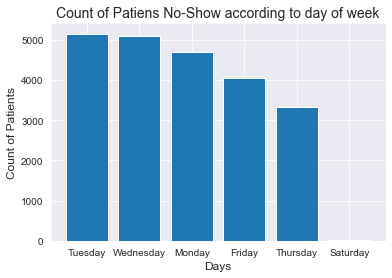

In [48]:
#First let's convert our appointment days to DayName rather than just dates
# We will be working on both dataframes

Day_no_show=df_no_show['appointmentday'].dt.day_name()  #Assigning Day with the day names of all days where patients did not show up
Day_show=df_show['appointmentday'].dt.day_name()        #Another one but with patients who did show up.  

y=Day_no_show.value_counts(sort=True);

labels=list(y.index)
x=np.arange(len(labels))

                  
plt.bar(x,y);         

plt.title('Count of Patiens No-Show according to day of week',fontsize=14);
plt.xlabel('Days',fontsize=12);
plt.ylabel('Count of Patients',fontsize=12)

plt.xticks(x,labels);


***Findings:*** It shows here that Tuesday and Wednesday are one of the highest days where no-shows tend to happen. Saturday is the least .

It really isn't an indicator. If we could dig in deeper to the hour of day to know when is the most no-show occuring in the day. But our dataset does not provide with the time of the appointment. 

<a id='Q7'></a>
### Q7: Which neighbourhood has the highest no show?

In [49]:
df_no_show['neighbourhood'].value_counts()

JARDIM CAMBURI                 1465
MARIA ORTIZ                    1219
ITARARÉ                         923
RESISTÊNCIA                     905
CENTRO                          703
                               ... 
PONTAL DE CAMBURI                12
ILHA DO BOI                       3
ILHAS OCEÂNICAS DE TRINDADE       2
ILHA DO FRADE                     2
AEROPORTO                         1
Name: neighbourhood, Length: 80, dtype: int64

***Findngs***: Jardim Camburi is the neighbourhood with the highest no show.

<a id='conclusions'></a>
## Conclusion:

What we can conclude from our analysis :

1) People with serious medical conditions do show- up to their appointments with a ratio a lot more than those who don't.If we focus on the percentage that don't show up, we will find that patients who suffer from hypertension are the ones with the highest percentage

2) SMS reminders can be very helpful to reduce no shows. Even though most of the patients who showed up did not receive a message reminder. But that could be because it was a same-day appointment.The number of patients who did not receive a message and didn't show up were alot more than those who did receive a message. So it's better for the hospital to send SMS reminders specially for long waiting days. 

3) Owning a scholarship might have an minor effect on the possibilty of a no-show happening. As most of no-show patients did not own a scholarship. Even though most patients that showed up did not own a scholarship as well.

4) Female adults have the highest no-show 

5) Adults with the age of 25 till 40 have the highest no-show 

6) Waiting days is a very important factor that the hospital needs to take care of. The percentage of people not showing up after 25 days are alot more than those who do show-up . So it's better to keep the appointment day nearer to the scheduled day.

7) Tuesdays and Wednesdays have the highest no-show rates. While Saturday is the least. We do not have enough data to know the hour of the day when no-show tends to happen. 

8) Jardim Camburi has the highest number of patients that did not show up.

**Limitations:** Not having the time of appointment 